In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.colors import to_rgba
import os
import sys
from tqdm.notebook import tqdm
import statistics

# get version
print("Matplotlib version",mpl.__version__)

mpl.rc('font', family = 'Arial')
plt.ioff()

fp = "G:\\My Drive\\Darby Work\\Ytsma and Dyar 2021 (LOD paper)\\"
# read in results
data = pd.read_csv(fp + "average_train_results.csv")
# detailed results
detail_data = pd.read_csv(fp + "train_results.csv")

Matplotlib version 3.4.2


In [2]:
# REMOVE NORMALIZED RESULTS
data = data[data.normalization=='norm3'].reset_index(drop=True).drop(columns='normalization')
detail_data = detail_data[detail_data.normalization=='norm3'].reset_index(drop=True).drop(columns='normalization')

# Get compositional overview

In [5]:
mhc_comps = pd.read_csv(fp+'tables\\TableS1_MHC_sample_compositions.csv')
lanl_comps = pd.read_csv(fp+'tables\\TableS2_LANL_sample_compositions.csv')

# remove units
mhc_comps.columns = mhc_comps.columns.str.strip(' (wt%)| (ppm)')
lanl_comps.columns = lanl_comps.columns.str.strip(' (wt%)| (ppm)')

In [7]:
outlier_limits = pd.read_csv('Z:\\Millennium Set\\NEW_OUTLIER_LIMITS.csv')
iqr_outliers = dict(zip(outlier_limits.element, outlier_limits.iqr_q3_outlier_limit))
natl_outliers = dict(zip(outlier_limits.element, outlier_limits.highest_natural_for_doped))

In [68]:
count = 0
for comps in [mhc_comps, lanl_comps]:
    
    if count==0:
        name='MHC'
    else:
        name="LANL"
    count+=1
    
    elem_list = []
    mean_list = []
    med_list = []
    max_list = []
    n_list=[]
    imean_list = []
    imed_list = []
    imax_list = []
    in_list=[]
    nmean_list = []
    nmed_list = []
    nmax_list = []
    nn_list=[]
    iqr_list = []
    natl_list = []
    
    for element in mhc_comps.columns[2:]:
        
        iqr_out = iqr_outliers[element]
        natl_out = natl_outliers[element]
    
        all_data = list(comps[~comps[element].isna()][element])
        n_all = len(all_data)
        all_mean = round(statistics.mean(all_data),3)
        all_median = round(statistics.median(all_data),3)
        all_max = round(max(all_data),3)
        
        iqr_data = list(comps[comps[element] <= iqr_out][element])
        n_iqr = len(iqr_data)
        iqr_mean = round(statistics.mean(iqr_data),3)
        iqr_median = round(statistics.median(iqr_data),3)
        iqr_max = round(max(iqr_data),3)
        
        if ~np.isnan(natl_out):
            natl_data = list(comps[comps[element] <= natl_out][element])
            n_natl = len(natl_data)
            natl_mean = round(statistics.mean(natl_data),3)
            natl_median = round(statistics.median(natl_data),3)
            natl_max = round(max(natl_data),3)
        else:
            n_natl = 'NA'
            natl_mean = 'NA'
            natl_median = 'NA'
            natl_max = 'NA'
            natl_out = 'NA'
        
        elem_list.append(element)
        n_list.append(n_all)
        mean_list.append(all_mean)
        med_list.append(all_median)
        max_list.append(all_max)
        in_list.append(n_iqr)
        imean_list.append(iqr_mean)
        imed_list.append(iqr_median)
        imax_list.append(iqr_max)
        nn_list.append(n_natl)
        nmean_list.append(natl_mean)
        nmed_list.append(natl_median)
        nmax_list.append(natl_max)
        natl_list.append(natl_out)
        iqr_list.append(iqr_out)
        
    results = pd.DataFrame({
        'element':elem_list,
        'all_n':n_list,
        'all_med':med_list,
        'all_mean':mean_list,
        'all_max':max_list,
        'natl_lim':natl_list,
        'natl_n':nn_list,
        'natl_med':nmed_list,
        'natl_mean':nmean_list,
        'natl_max':nmax_list,
        'iqr_lim':iqr_list,
        'iqr_n':in_list,
        'iqr_med':imed_list,
        'iqr_mean':imean_list,
        'iqr_max':imax_list
    })
    
    results.to_csv(fp+name+'_sample_summary.csv', index=False)

# Braga regions
CADILLAC ChemLIBS

In [2]:
cad = pd.read_csv(fp + "figures\\cadillac_spectra.csv")
peaks = pd.read_csv(fp + "figures\\braga_peaks.csv") 
noise = pd.read_csv(fp + "figures\\braga_noise_regions.csv") 

In [7]:
# plot defining things
height = 0.052
b_y = -.003
box_list = []
rcolor = '#8b8b8b'
base='black'
b_a =1
alpha = 0.5
lwidth=1
x_data = cad['wave']
y_data = cad['intensity']
peak_x = peaks['peak']
peak_y = peaks['intensity']
peak_labs = peaks['element']
size=70
mark="*"
mwidth=0.5
mcolor='goldenrod'
c_l = 'navy'
c_m = 'goldenrod'
llabel = 'LANL (ChemCam)'
mlabel = 'MHC (ChemLIBS)'
ysize = 12
lsize = 14
tsize = 16
klen = 5

NameError: name 'cad' is not defined

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

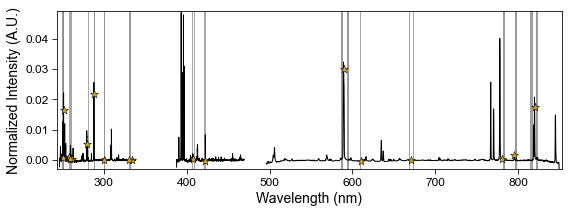

In [19]:
# get width of regions
noise['width'] = noise['stop'] - noise['start']

#make rectangles
for i in np.array(range(len(noise))):
    x = noise['start'][i]  
    width = noise['width'][i]
    box_list.append(Rectangle((x, b_y), width, height))
    
pc = PatchCollection(box_list, edgecolor = to_rgba(rcolor, alpha), facecolor=to_rgba(rcolor, alpha))
#pc = PatchCollection(box_list, hatch = '..')

# plot it all
fig, ax = plt.subplots(1, figsize = (8,3))
ax.plot(x_data, y_data, color=base, linewidth = lwidth, alpha = b_a, zorder=1) #spectrum
ax.scatter(peak_x, peak_y, facecolor = mcolor, edgecolor=base, s = size, marker = mark, linewidth = mwidth, zorder=3) # peaks
ax.add_collection(pc) # noise regions
ax.margins(x=0.005, y=0.0)
ax.set_xlabel('Wavelength (nm)', fontsize=lsize)
ax.set_ylabel('Normalized Intensity (A.U.)', fontsize = lsize)
ax.tick_params(length=klen, labelsize=ysize)

plt.tight_layout()
plt.savefig(fp + "figures\\braga_regions.eps", dpi=600)
plt.savefig(fp + "figures\\braga_regions.jpg", dpi=600)
plt.show()

## compare LOQ

In [3]:
mhc_sum = pd.read_csv(fp+'MHC_sample_summary.csv')

In [4]:
iqr_means = dict(zip(mhc_sum.element, mhc_sum.iqr_mean))
natl_means = dict(zip(mhc_sum.element, mhc_sum.natl_mean))
iqr_meds = dict(zip(mhc_sum.element, mhc_sum.iqr_med))
natl_meds = dict(zip(mhc_sum.element, mhc_sum.natl_med))

In [5]:
# add median and mean values
data['mean'] = np.nan
data['median'] = np.nan

for elem in data.element.unique():
    data.loc[(data.element==elem) & (data.outlier_defn=='high_natl'), 'mean'] = natl_means[elem]
    data.loc[(data.element==elem) & (data.outlier_defn=='high_natl'), 'median'] = natl_meds[elem]
    data.loc[(data.element==elem) & (data.outlier_defn=='iqr_q3'), 'median'] = iqr_meds[elem]
    data.loc[(data.element==elem) & (data.outlier_defn=='iqr_q3'), 'mean'] = iqr_means[elem]

In [6]:
# get loqs as percent
data['loq_per_med'] = (data['loq'] / data['median']) * 100
data['loq_per_mean'] = (data['loq'] / data['mean']) * 100

In [8]:
data.to_csv(fp+'results_with_percents.csv', index=False)

## Compare LOQ for method 1 to LOQ for method 2 
(for atms, use Mars as method 1, earth & vac for method 2)
#### OUTLIER REMOVAL

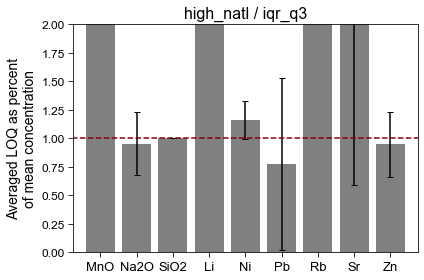

In [25]:
elem_list = ['MnO', 'Na2O', 'SiO2', 'Li', 'Ni', 'Pb', 'Rb', 'Sr', 'Zn']
vals = []
sds = []
elems = []
for element in elem_list:
    temp = []
    for atm in data.atmosphere.unique():
        df = data[(data.element==element)&
                  (data.instrument=='CL')&
                  (data.atmosphere==atm)&
                  (data.sens_method=='braga')].copy(deep=True)

        natl_val = df[df.outlier_defn=='high_natl'].reset_index(drop=True)['loq_per_mean'][0]
        iqr_val = df[df.outlier_defn=='iqr_q3'].reset_index(drop=True)['loq_per_mean'][0]

        ratio =  natl_val / iqr_val
        temp.append(ratio)

    # get avg and std of ratio per element
    avg = statistics.mean(temp)
    sd = np.std(temp)
    
    elems.append(element)
    vals.append(avg)
    sds.append(sd)
    
out_ratios = pd.DataFrame({
    'element':elems,
    'ratio_avg':vals,
    'ratio_sd':sds
})

plt.bar(out_ratios.index, 
        out_ratios.ratio_avg, 
        yerr=out_ratios.ratio_sd, 
        tick_label=out_ratios.element,
        capsize=3,
        color='grey')
plt.tick_params(length=5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.hlines(1, -1, 9, color='darkred', linestyles='dashed')
plt.title('high_natl / iqr_q3', fontsize = 16)
plt.ylabel('Averaged LOQ as percent\nof mean concentration', fontsize=14)
plt.ylim(0,2)
plt.xlim(-0.75, 8.75)
plt.tight_layout()
plt.savefig(fp + "figures\\outlier_loq_mean_ratio.eps", dpi=600)
plt.show()

#### INSTRUMENT

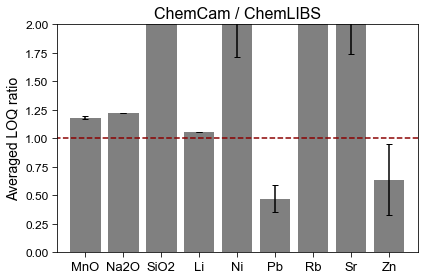

In [20]:
vals = []
sds = []
elems = []
for element in elem_list:
    temp = []
    for out in data.outlier_defn.unique():
        df = data[(data.element==element)&
                  (data.outlier_defn==out)&
                  (data.atmosphere=='Mars')&
                  (data.sens_method=='braga')].copy(deep=True)

        cc_val = df[df.instrument=='CC'].reset_index(drop=True)['loq'][0]
        cl_val = df[df.instrument=='CL_CC'].reset_index(drop=True)['loq'][0]

        ratio =  cc_val / cl_val
        temp.append(ratio)
    
    # get avg and std of ratio per element
    avg = statistics.mean(temp)
    sd = np.std(temp)
    
    elems.append(element)
    vals.append(avg)
    sds.append(sd)
    
inst_ratios = pd.DataFrame({
    'element':elems,
    'ratio_avg':vals,
    'ratio_sd':sds
})

plt.bar(inst_ratios.index, 
        inst_ratios.ratio_avg, 
        yerr=inst_ratios.ratio_sd, 
        tick_label=inst_ratios.element,
        capsize=3,
        color='grey')
plt.tick_params(length=5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.hlines(1, -1, 9, color='darkred', linestyles='dashed')
plt.title('ChemCam / ChemLIBS', fontsize = 16)
plt.ylabel('Averaged LOQ ratio', fontsize=14)
plt.ylim(0,2)
plt.xlim(-0.75, 8.75)
plt.tight_layout()
plt.savefig(fp + "figures\\instrument_loq_ratio.eps", dpi=600)
plt.show()

#### ATMOSPHERE

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


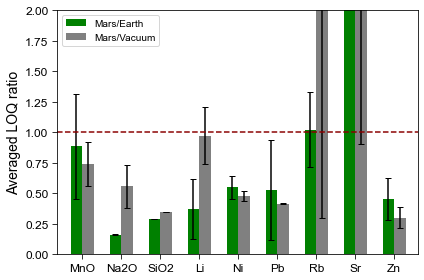

In [22]:
e_vals = []
v_vals = []
e_sds = []
v_sds = []
elems = []
for element in elem_list:
    e_temp = []
    v_temp = []
    for out in data.outlier_defn.unique():
        df = data[(data.element==element)&
                  (data.instrument=='CL')&
                  (data.outlier_defn==out)&
                  (data.sens_method=='braga')].copy(deep=True)
            
        mars_val = df[df.atmosphere=='Mars'].reset_index(drop=True)['loq'][0]
        earth_val = df[df.atmosphere=='Earth'].reset_index(drop=True)['loq'][0]
        vac_val = df[df.atmosphere=='Vacuum'].reset_index(drop=True)['loq'][0]

        e_ratio =  mars_val / earth_val
        v_ratio = mars_val / vac_val

        e_temp.append(e_ratio)
        v_temp.append(v_ratio)
    
    # get avg and std of ratio per element
    e_avg = statistics.mean(e_temp)
    e_sd = np.std(e_temp)
    v_avg = statistics.mean(v_temp)
    v_sd = np.std(v_temp)
    
    elems.append(element)
    e_vals.append(e_avg)
    e_sds.append(e_sd)
    v_vals.append(v_avg)
    v_sds.append(v_sd)
    
atm_ratios = pd.DataFrame({
    'element':elems,
    'earth_avg':e_vals,
    'earth_sd':e_sds,
    'vac_avg':v_vals,
    'vac_sd':v_sds
})

# tick locations
width = 0.6
et = [i*2 for i in atm_ratios.index]
vt = [x + width for x in et]
tk = [x + width/2 for x in et]

earth = plt.bar(et, 
                atm_ratios.earth_avg, 
                yerr=atm_ratios.earth_sd, 
                width=width,
                label='Mars/Earth',
                capsize=3,
                color='green')
vac = plt.bar(vt, 
              atm_ratios.vac_avg, 
              yerr=atm_ratios.vac_sd, 
              width=width,
              label='Mars/Vacuum',
              capsize=3,
              color='grey')

plt.xticks(tk, labels=atm_ratios.element,fontsize = 12)
plt.tick_params(length=5)
plt.yticks(fontsize=12)
plt.hlines(1, -1, 17.5, color='darkred', linestyles='dashed')
plt.legend(loc='best')
plt.ylabel('Averaged LOQ ratio', fontsize=14)
plt.ylim(0,2)
plt.xlim(-1, 17.5)
plt.tight_layout()
plt.savefig(fp + "figures\\atms_loq_ratio.eps", dpi=600)
plt.show()

### Test results

In [45]:
test = pd.read_csv(fp+'average_test_results.csv')
test_maj = test.loc[:2]
test_min = test.loc[3:].reset_index(drop=True)

#### RMSEPs

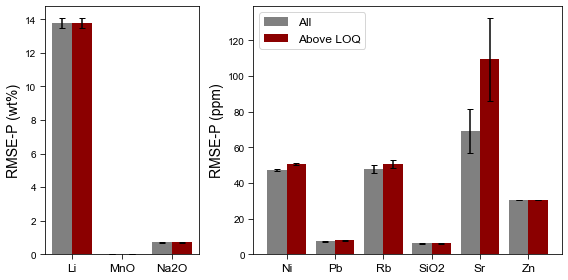

In [48]:
width = 0.2
label1 = 'All'
label2 = 'Above LOQ'
c_b = 'grey'
c_m = 'darkred'
cap=3
ysize=10
klen=5
lsize=12
tsize=14

#labels
majlab = test_maj.element
minlab = test_min.element

# tick locations
majt1 = [0, 0.5, 1] 
majt2 = [x + width for x in majt1]
mint1 = np.arange(0,3,step=0.5)
mint2 = [x + width for x in mint1]
majtk = [x + width/2 for x in majt1]
mintk = [x + width/2 for x in mint1]

# make figure
fig, (maj, minor) = plt.subplots(ncols = 2, figsize = (8,4),
                                 # make major one smaller
                                 gridspec_kw={'width_ratios': [1,2]})
# majors
df1_major = maj.bar(majt1, test_maj['rmsep_all'], width, yerr=test_maj['rmsep_all_sd'], capsize=cap, label = label1, color = c_b)
df2_major = maj.bar(majt2, test_maj['rmsep_loq'], width, yerr=test_maj['rmsep_loq_sd'], capsize=cap, label = label2, color = c_m)
# minors
df1_minor = minor.bar(mint1, test_min['rmsep_all'], width, yerr=test_min['rmsep_all_sd'], capsize=cap, label = label1, color = c_b)
df2_minor = minor.bar(mint2, test_min['rmsep_loq'], width, yerr=test_min['rmsep_loq_sd'], capsize=cap, label = label2, color = c_m)

# formatting
maj.tick_params(axis = 'y', which = 'major', labelsize = ysize,)
maj.tick_params(length=klen)
maj.set_xticks(majtk)
maj.set_xticklabels(majlab, fontsize = lsize)
maj.set_ylabel('RMSE-P (wt%)', fontsize = tsize)

minor.set_xticks(mintk)
minor.set_xticklabels(minlab, fontsize = lsize)
minor.set_ylabel('RMSE-P (ppm)', fontsize = tsize)
minor.tick_params(axis = 'y', which = 'major', labelsize = ysize)  
minor.tick_params(length=klen)
minor.legend(handles = [df1_major, df2_major], fontsize = lsize)

plt.tight_layout()
#plt.savefig(fp + "figures\\atms_loq_ratio.eps", dpi=600)
plt.show()

#### R2

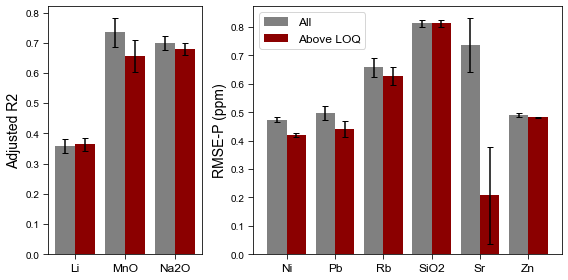

In [49]:
# make figure
fig, (maj, minor) = plt.subplots(ncols = 2, figsize = (8,4),
                                 # make major one smaller
                                 gridspec_kw={'width_ratios': [1,2]})
# majors
df1_major = maj.bar(majt1, test_maj['adj_r2_all'], width, yerr=test_maj['adj_r2_all_sd'], capsize=cap, label = label1, color = c_b)
df2_major = maj.bar(majt2, test_maj['adj_r2_loq'], width, yerr=test_maj['adj_r2_loq_sd'], capsize=cap, label = label2, color = c_m)
# minors
df1_minor = minor.bar(mint1, test_min['adj_r2_all'], width, yerr=test_min['adj_r2_all_sd'], capsize=cap, label = label1, color = c_b)
df2_minor = minor.bar(mint2, test_min['adj_r2_loq'], width, yerr=test_min['adj_r2_loq_sd'], capsize=cap, label = label2, color = c_m)

# formatting
maj.tick_params(axis = 'y', which = 'major', labelsize = ysize,)
maj.tick_params(length=klen)
maj.set_xticks(majtk)
maj.set_xticklabels(majlab, fontsize = lsize)
maj.set_ylabel('Adjusted R2', fontsize = tsize)

minor.set_xticks(mintk)
minor.set_xticklabels(minlab, fontsize = lsize)
minor.set_ylabel('RMSE-P (ppm)', fontsize = tsize)
minor.tick_params(axis = 'y', which = 'major', labelsize = ysize)  
minor.tick_params(length=klen)
minor.legend(handles = [df1_major, df2_major], fontsize = lsize)

plt.tight_layout()
#plt.savefig(fp + "figures\\atms_loq_ratio.eps", dpi=600)
plt.show()